#Gold & Silver Price prediction using Arima

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, matplotlib

#pandas= data Manipulation and analysis
#Arima = Forecasting
#matplotlib= data visualization


In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 13.0 MB/s 
     |████████████████████████████████| 9.5 MB 41.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset & Exploring it

In [4]:
df = pd.read_csv('silver.csv')

In [ ]:
#read_csv function from pandas

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-09,17.830000,17.830000,17.715000,17.774000,17.774000,3.0
1,2020-06-10,17.775999,17.775999,17.775999,17.775999,17.775999,0.0
2,2020-06-11,18.084999,18.084999,17.830000,17.868999,17.868999,5.0
3,2020-06-12,17.750000,17.750000,17.462000,17.462000,17.462000,13.0
4,2020-06-15,17.379000,17.500000,17.379000,17.379000,17.379000,1.0
...,...,...,...,...,...,...,...
248,2021-06-03,27.190001,27.459999,27.190001,27.459999,27.459999,20.0
249,2021-06-04,27.879000,27.879000,27.879000,27.879000,27.879000,0.0
250,2021-06-07,27.615000,28.000999,27.615000,28.000999,28.000999,4.0
251,2021-06-08,28.010000,28.010000,27.705000,27.715000,27.715000,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.0+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,24.953450,25.183000,24.711849,24.952841,24.952841,1803.223108
std,2.824897,2.847843,2.755653,2.780320,2.780320,11179.154710
min,17.379000,17.495001,17.379000,17.379000,17.379000,0.000000
25%,24.140000,24.344000,23.950000,24.154999,24.154999,12.500000
50%,25.520000,25.733999,25.311001,25.520000,25.520000,66.000000
75%,27.030001,27.167501,26.575000,26.964000,26.964000,212.500000
max,29.530001,30.160000,28.313999,29.398001,29.398001,131415.000000


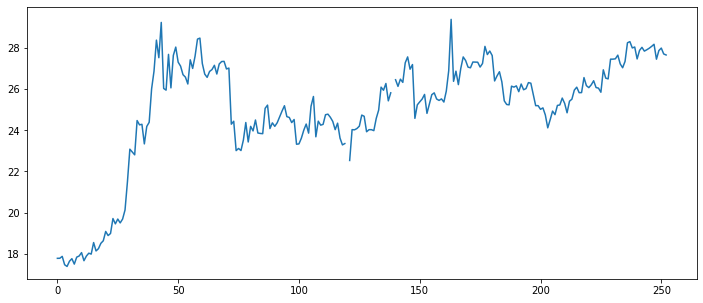

In [8]:
df['Close'].plot(figsize=(12,5))

# Understanding Auto Regressive Integrated Moving Average (ARIMA)

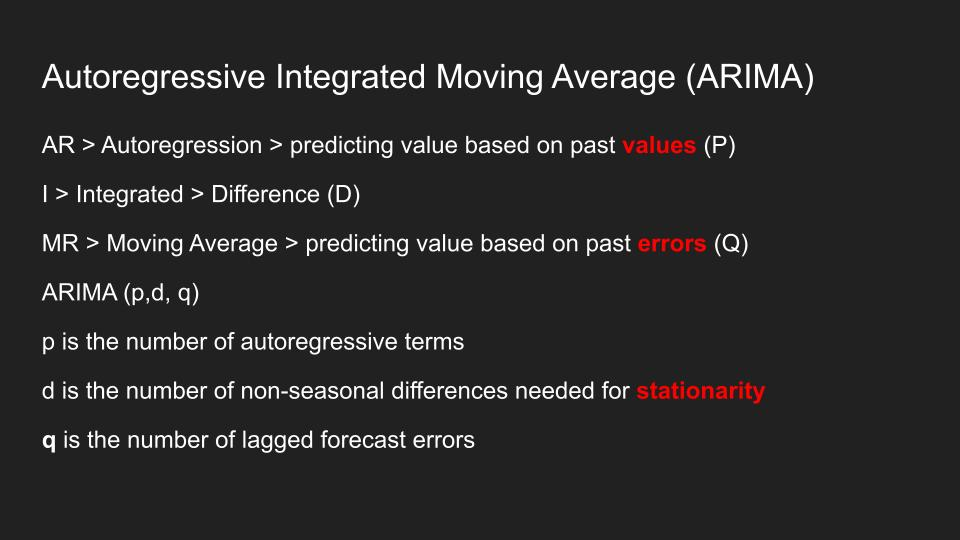

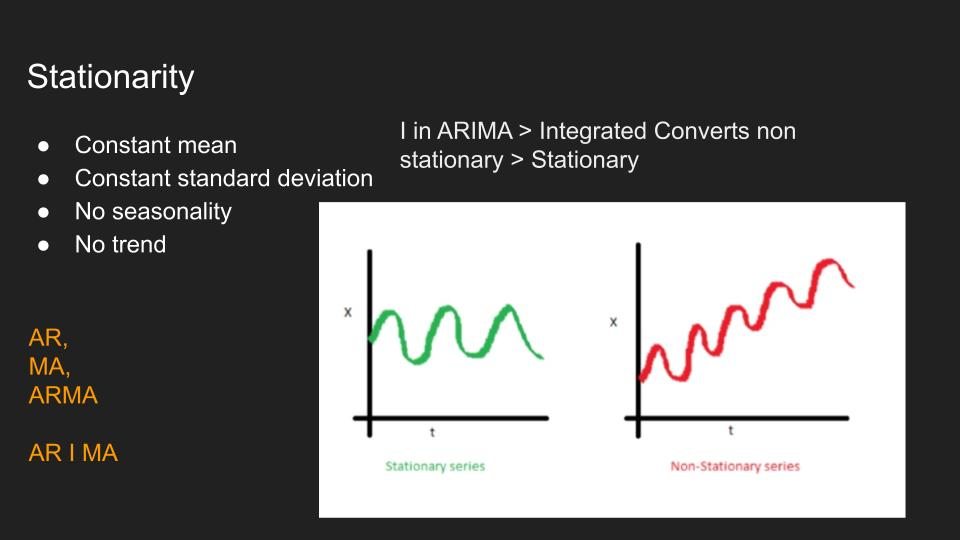

#Finding Order (P,D,Q)

In [9]:
from pmdarima import auto_arima

In [10]:
df = df.dropna()
best_order = auto_arima(df['Close'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=524.207, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=530.296, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=518.940, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=519.506, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=529.109, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=520.933, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=520.932, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=522.938, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=518.231, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=520.203, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=520.203, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=518.914, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=521.967, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.433 seconds


## Data Preperation-Train Test Split

In [11]:
columns = ['Close']
df = pd.DataFrame(df,columns=columns)

In [12]:
df

,Close
0,17.774000
1,17.775999
2,17.868999
3,17.462000
4,17.379000
...,...
248,27.459999
249,27.879000
250,28.000999
251,27.715000


In [13]:
  train, test = df[0:int(len(df)*0.85)], df[int(len(df)*0.85):]

In [14]:
train.shape,test.shape

((213, 1), (38, 1))

In [15]:
df.shape

(251, 1)

## Creating ARIMA Model

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1,1,0))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  212
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -229.673
Method:                       css-mle   S.D. of innovations              0.715
Date:                Thu, 19 Aug 2021   AIC                            465.346
Time:                        07:19:50   BIC                            475.416
Sample:                             1   HQIC                           469.416
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0383      0.040      0.956      0.339      -0.040       0.117
ar.L1.D.Close    -0.2276      0.067     -3.411      0.001      -0.358      -0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.3931           +0.0000j            4.3931            0.5000
-----------------------------------------------------------------------------
"""

## Forecasting

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


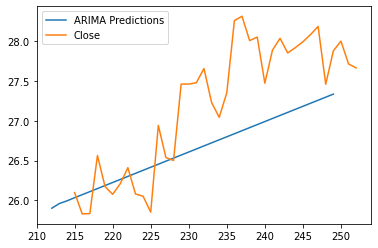

In [17]:
start=len(train)               ##Example= y1,y2,y3 > y3-y2,y2-y1 (Total elements is 3 but after using Arima its 2 > data- 1 
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

### Error

In [18]:
## ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

0.7619906346244743


In [19]:
df.describe()

,Close
count,251.000000
mean,24.952841
std,2.780320
min,17.379000
25%,24.154999
50%,25.520000
75%,26.964000
max,29.398001


##More Forecast Graphs

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


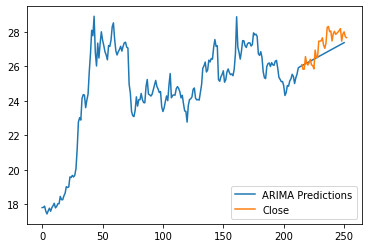

In [21]:
start=1
end=251
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


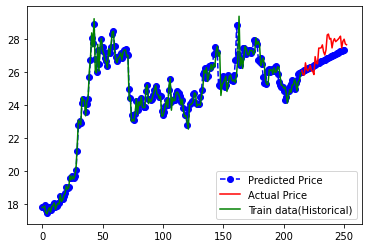

In [22]:
start=1
end=251
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



## 30 days into the future

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


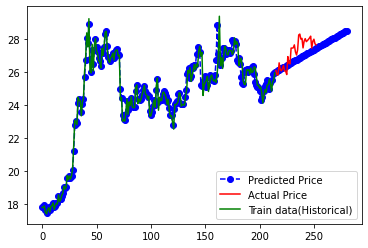

In [23]:
### 30 days into the future

start=1
end=281
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')

